In [232]:
from datetime import datetime, timezone
import pmdarima as pm
import warnings
import datetime
import json
import numpy as np
import pandas as pd
from format import format_data_frame
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


import pickle
import json

import warnings
warnings.filterwarnings("ignore")

In [233]:
main_result_date_time = datetime.datetime.now().now(timezone.utc).strftime("%H_%M_%S_%d_%m_%Y")
model_id = f'AutoARIMA_{main_result_date_time}'


meta_params = {
    'dataset_year_start': 1946,
    'resample_size': 3,
    # 'drop_cols': ['DATE', 'month', 'SOUID', 'Q_TG'],
    'drop_cols': ['month', 'SOUID', 'Q_TG'],
    'train_percentage': 0.90,
    'data_limit':100000,
    'resample_date_val': 'M',
    'AutoARIMA': {
        "m": 12,
        "d": 1,
        "maxiter": 50,
        "seasonal": True,
        "start_p": 4,
        "max_p": 4,
        "start_q": 20,
        "max_q": 20,
        "stepwise":True,
        "trace": True,
        "test": "adf",
        "n_jobs": 6
}


In [234]:
# --- Prepare Data ---
df = pd.read_csv(f"./data/TG_STAID002759.txt",
                 header=14, index_col=1, parse_dates=True)

df = format_data_frame(df, set_index_time_step=False, first_date=meta_params['dataset_year_start'], drop_cols=meta_params['drop_cols'])
df

,temp_c
DATE,
1947-01-01,-2.4
1947-01-02,-3.5
1947-01-03,-4.5
1947-01-04,-12.7
1947-01-05,-15.0
...,...
2022-09-26,13.6
2022-09-27,11.2
2022-09-28,9.4


# Resample

In [235]:
df = df.tail(int(round(meta_params['data_limit']/meta_params['train_percentage'],0)))

df = df.resample(meta_params['resample_date_val']).mean()
df

,temp_c
DATE,
1947-01-31,-5.622581
1947-02-28,-8.496429
1947-03-31,1.858065
1947-04-30,10.300000
1947-05-31,16.532258
...,...
2022-05-31,15.880645
2022-06-30,20.663333
2022-07-31,20.587097


# Set Train and Test

In [236]:
train_size = int(len(df) * meta_params['train_percentage'])
train, test = df[0:train_size], df[train_size:]
train

,temp_c
DATE,
1947-01-31,-5.622581
1947-02-28,-8.496429
1947-03-31,1.858065
1947-04-30,10.300000
1947-05-31,16.532258
...,...
2014-10-31,12.867742
2014-11-30,7.213333
2014-12-31,3.041935


In [237]:
# Use box cox transformation here if required

# Use Automated Algorithm

In [238]:

arima = pm.AutoARIMA(**meta_params['AutoARIMA'])

model_fit = arima.fit(train)

Performing stepwise search to minimize aic
 ARIMA(4,1,11)(1,0,1)[12] intercept   : AIC=3502.969, Time=9.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4703.689, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4100.615, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4427.309, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4701.693, Time=0.03 sec
 ARIMA(4,1,11)(0,0,1)[12] intercept   : AIC=inf, Time=7.98 sec
 ARIMA(4,1,11)(1,0,0)[12] intercept   : AIC=3473.644, Time=5.16 sec
 ARIMA(4,1,11)(0,0,0)[12] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(4,1,11)(2,0,0)[12] intercept   : AIC=3476.335, Time=10.75 sec
 ARIMA(4,1,11)(2,0,1)[12] intercept   : AIC=3493.298, Time=12.95 sec
 ARIMA(3,1,11)(1,0,0)[12] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(4,1,10)(1,0,0)[12] intercept   : AIC=3473.367, Time=4.89 sec
 ARIMA(4,1,10)(0,0,0)[12] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(4,1,10)(2,0,0)[12] intercept   : AIC=inf, Time=10.55 sec
 ARIMA(4,1,10)(1,0,1)[12] inter

In [239]:
logs = arima.summary()
logs

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  818
Model:             SARIMAX(4, 1, 9)x(1, 0, [], 12)   Log Likelihood               -1720.109
Date:                             Fri, 11 Nov 2022   AIC                           3472.219
Time:                                     15:04:35   BIC                           3547.509
Sample:                                          0   HQIC                          3501.113
                                             - 818                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.002      0.728      0.467      -0.003       0.006
ar.L1          0.5487      0.496      1.105      0.269      -0.424       1.522
ar.L2          0.5584      0.452      1.235      0.217      -0.327       1.444
ar.L3         -0.3336      0.383     -0.872      0.383      -1.083       0.416
ar.L4         -0.4885      0.466     -1.049      0.294      -1.401       0.424
ma.L1         -1.2746      0.495     -2.575      0.010      -2.245      -0.304
ma.L2         -0.2969      0.795     -0.373      0.709      -1.856       1.262
ma.L3          0.8032      0.394      2.039      0.041       0.031       1.575
ma.L4          0.2681      0.756      0.354      0.723      -1.215       1.751
ma.L5         -0.4193      0.305     -1.373      0.170      -1.018       0.179
ma.L6         -0.0615      0.105     -0.585      0.559      -0.267       0.144
ma.L7          0.1049      0.071      1.480      0.139      -0.034       0.244
ma.L8         -0.1386      0.096     -1.447      0.148      -0.326       0.049
ma.L9          0.0405      0.061      0.663      0.507      -0.079       0.160
ar.S.L12       0.0365      0.049      0.745      0.456      -0.059       0.132
sigma2         4.0912      0.197     20.797      0.000       3.706       4.477
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                43.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:
y_forecast, ci = arima.predict(len(test), return_conf_int=True)
test['prediction'] = np.round(y_forecast, 1)
test

,temp_c,prediction
DATE,,
2015-03-31,6.332258,5.5
2015-04-30,9.683333,10.4
2015-05-31,13.861290,14.8
2015-06-30,17.210000,18.3
2015-07-31,20.432258,19.9
...,...,...
2022-05-31,15.880645,14.8
2022-06-30,20.663333,18.1
2022-07-31,20.587097,19.5


In [241]:
import math  
import sklearn.metrics  
actual = test  
predicted = y_forecast  
mse = sklearn.metrics.mean_squared_error(test['temp_c'], test['prediction'])  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse) 

The difference between actual and predicted values 1.8868498837978045


## Save results 

In [242]:

result_meta = {
    'score': {
        'rmse': rmse
    },
    **meta_params,
    'model': {
        **arima.get_params(),
        'report': list(
            map(
                lambda t: {'data': t.data, 'output_formats': t.output_formats,
                           'title': t.title}, logs.tables
            )
        )
    }
    # 'best_result': result_to_json(run_data['best_result']),
    # 'results': list(map(result_to_json,run_data['results']))
}

dir_for_model = f'./artifacts/models/{model_id}/'
dir_for_model_images = f'./artifacts/models/{model_id}/images/'
dir_for_model_results = f'./artifacts/models/{model_id}/results/'
path_for_model = f'{dir_for_model}{model_id}.sav'
path_for_model_meta_data = f'{dir_for_model}/{model_id}_meta_data.json'

os.makedirs(os.path.dirname(dir_for_model), exist_ok=True)
os.makedirs(os.path.dirname(dir_for_model_images), exist_ok=True)
os.makedirs(os.path.dirname(dir_for_model_results), exist_ok=True)

test.to_csv(dir_for_model_results + 'y_vs_ypred.csv',)

pickle.dump(arima, open(
    f'{path_for_model}', 'wb'), protocol=None, fix_imports=True)

# Serializing json
json_object = json.dumps(result_meta, indent=4)

# Writing to file
with open(path_for_model_meta_data, "w") as outfile:
    outfile.write(json_object)

In [243]:
def plot_predictions(df, title='Year vs Temp C', ylim=True ,save_path = None ):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; default is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('# of Passengers in 1000')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

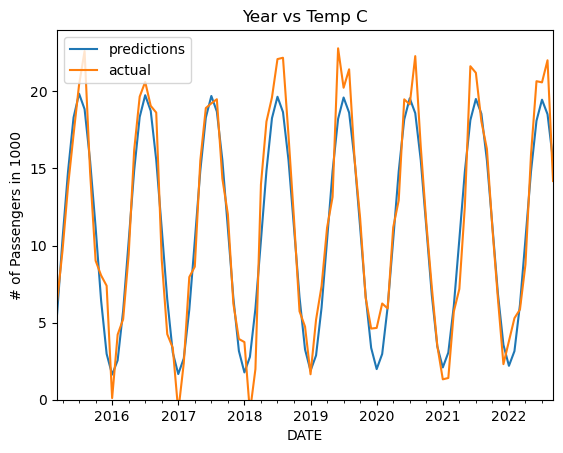

In [244]:
plot_predictions(pd.DataFrame({'predictions':y_forecast, 'actual': test['temp_c'] }))

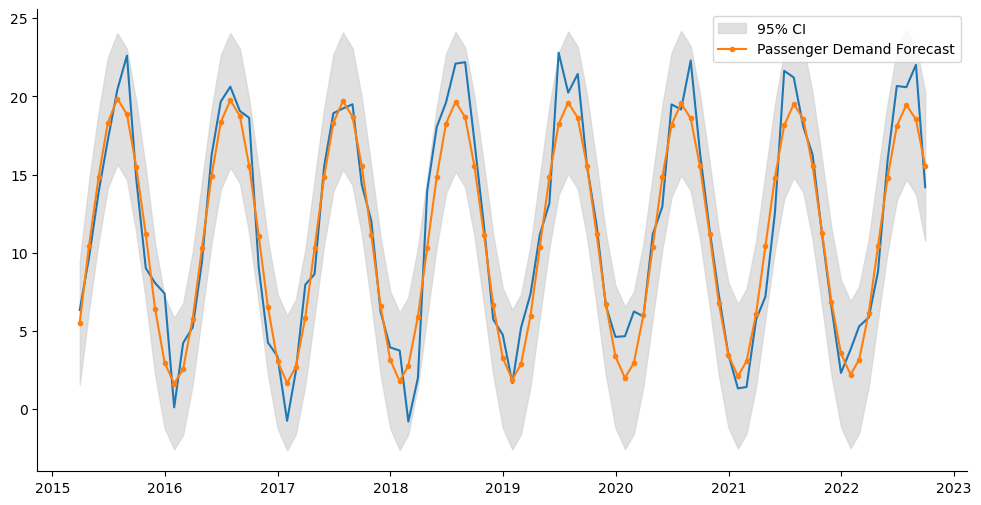

In [245]:
index_vals = test.index.values
plt.figure(figsize=(12,6))
plt.plot(index_vals, test['temp_c'])
plt.fill_between(index_vals, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
plt.plot(index_vals, y_forecast, label='Weather Forecast', marker='.')
sns.despine()
plt.savefig(dir_for_model_images + 'forecast.png' )
plt.legend()

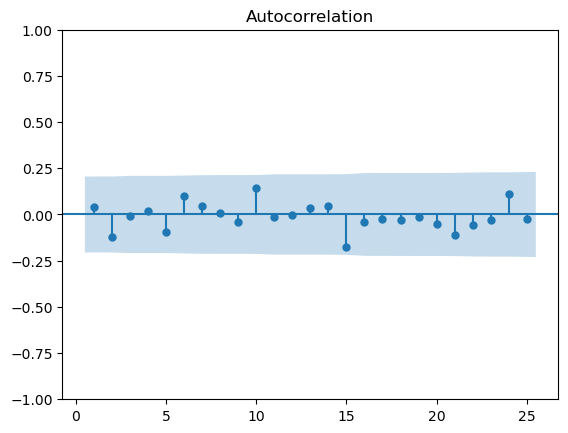

In [246]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(test['temp_c'] - test['prediction'], zero=False,lags=25)
plt.savefig(dir_for_model_images + 'auto_correlation.png' )
